In [4]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 회귀의 선형 모델

w[0]: 0.393906  b: -0.031804


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from c

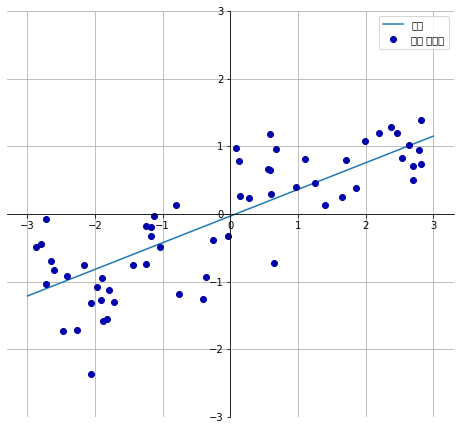

In [5]:
mglearn.plots.plot_linear_regression_wave()

선형 모델은 입력 특성에 대한 **선형 함수**를 만들어 예측을 수행한다.

**<회귀의 경우 선형 모델을 위한 일반화된 예측 함수>**
y_hat = w[0] + x[0] + w[1] + x[1] + ... + w[p] + x[p] + b

회귀를 위한 선형 모델은 다양하다 
-> 훈련 데이터로 부터 모델 파라미터 **w와 b를 학습하는 방법**과 **모델 복잡도를 제어하는 방법**에서 차이가 난다.

## 선형 회귀(최소 제곱법)
선형회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 **평균제곱오차**를 최소화하는 파라미터 w와 b를 찾는다.

평균 제곱 오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것이다.

**매개변수**가 없는 것이 장점이지만 **모델의 복잡도**를 제어할 방법이 없다.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [7]:
print("lr.coef_:", lr.coef_)  # 가중치 -> Numpy 배열(각 입력 특성에 하나씩 대응)
print("lr.intercept_:", lr.intercept_)  # 절편 -> 항상 실수값 하나

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [8]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


위의 훈련, 테스트 세트 점수의 결과는 그리 좋은 결과가 아니며 **과소적합**인 상태이다

1차원 데이터셋에서는 모델이 매우 단순하므로 과대적합을 걱정할 필요 X

그러나 고차원 데이터 셋에서는 선형 모델의 성능이 매우 높아져 과대적합될 가능성이 높다

In [9]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


위의 훈련, 테스트 데이터 사이의 성능 차이는 모델이 **과대적합**되었음을 알 수 있고 **복잡도를 제어할 수 있는 모델**을 사용하여야 한다

## 리지 회귀
기본 선형 회귀 방신 대신 갖아 널리 쓰이는 모델이다

리지 회귀에서의 가중치 선택은 **훈련 데이터를 잘 예측**하기 위해서 뿐만 아니라 **추가 제약 조건**을 만족시키기 위한 목적이 있다

모든 특성이 출력에 주는 영향을 최소한으로 만들며(기울기를 작게 만든다) 이런 제약을 **규제**라고 한다.

규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미이며 리지 회귀에서 사용하는 규제는 **L2 규제**이다

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [11]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


위의 식처럼 alpha 매개변수로 값을 지정하여 성능 대비 모델을 **얼마나 단순화할지** 지정할 수 있다.

**alpha 값을 높이면** 계수를 0에 더 가깝게 만들어서 훈련세트의 성능은 나빠지지만 **일반화**에는 도움을 줄 수 있다.

alpha값에 아무런 매개변수를 지정하지 않으면 1.0

In [12]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


## 선형 회귀와 몇 가지 alpha 값을 가진 리지 회귀의 계수 비교
아래의 그림을 통해 높은 alpha 값이 더 제약이 많으므로 coef_의 절대값 크기가 작다는 것을 알 수 있다 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from c

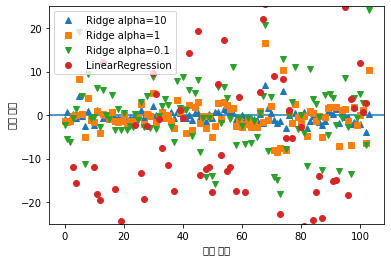

In [13]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label ="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

규제의 효과를 이해하는 또 다른 방법 : alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보기

**학습 곡선** : 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from c

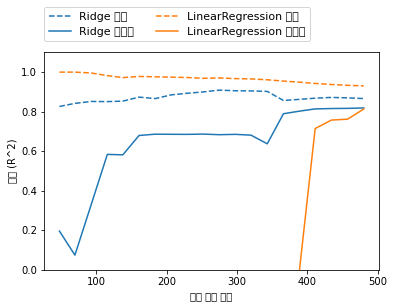

In [14]:
mglearn.plots.plot_ridge_n_samples()

1. 데이터를 충분히 주면 규제의 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것이다
2. 데이터가 많아질 수록 모델이 데이터를 기억하거나 과대적합 하기 어려워지기에 선형 회귀의 훈련 데이터 성능이 감소한다

선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 **Lasso**가 있다

라소도 계수를 0에 가깝게 만들려고 하며 **L1 규제**라고 한다 -> 어떤 계수(가중치)는 0이 된다 -> 완전히 제외되는 특성이 있다(특성선택)
-> 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 모델의 가장 중요한 특성이 무엇인지 드러내준다.
## 라소

In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ !=0))  # 가중치가 0이 아닌 것 더하기

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


위의 결과는 **과소적합**이며 104개 특성 중 4개만 사용한 것을 알 수 있다.

Lasso도 Ridge와 마찬가지로 alpha 매개변수 사용 가능하며 과소적합을 줄이기 위해 alpha 값을 줄이려면 max_iter 기본값을 늘려야 한다.
-> alpha 값을 줄이면 가장 낮은 오차를 찾아가는 반복횟수가 늘어나기 때문

아래의 코드는 과소적합을 줄이기 위해 alpha값을 줄임

In [16]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ !=0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


사용된 특성이 104개 중 33개 뿐이기에 alpha 값 더 낮추기 -> 그러나 너무 낮추면 규제의 효과가 없어져 과대적합이 된다

In [17]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ !=0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


# 분류용 선형 모델
- 로지스틱 회귀
- 서포트 벡터 머신

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


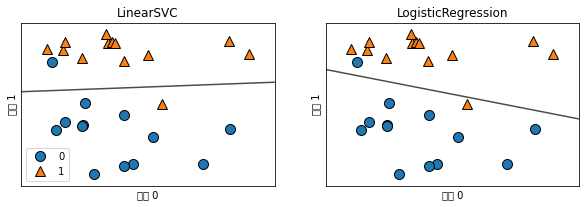

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()    

### forge 데이터셋에 따른 각기 다른 C 값으로 만든 선형 SVM 모델의 결정 경계

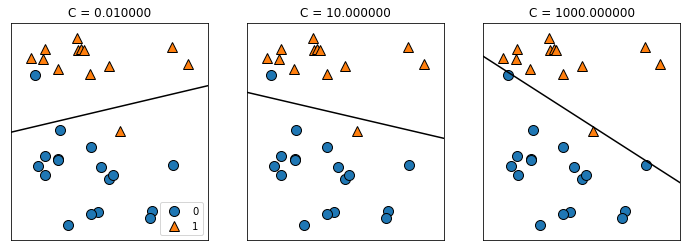

In [19]:
mglearn.plots.plot_linear_svc_regularization()

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train) # 훈련 시키기
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test,y_test)))

훈련 세트 점수: 0.941
테스트 세트 점수: 0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


위의 결과는 훈련 세트와 테스트 성능이 매우 비슷하므로 과소적합

모델의 제약을 풀어주기 위해 C 증가시켜보기

In [32]:
logreg100 = LogisticRegression(max_iter=100000, C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [35]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수: 0.937
테스트 세트 점수: 0.930


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 다중 클래스 분류용 선형 모델

많은 선형 분류 모델은 태생적으로 **이진 분류**만을 지원
**일대다 방식** : 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델 학습 -> 클래스 수만큼 이진 분류 모델이 만들어진다

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from c

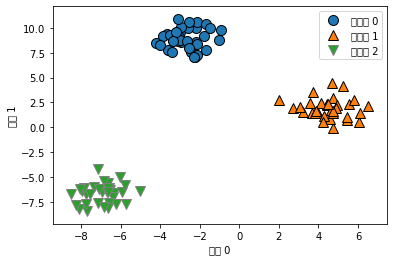

In [36]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [37]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)


계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


(-10.0, 8.0)

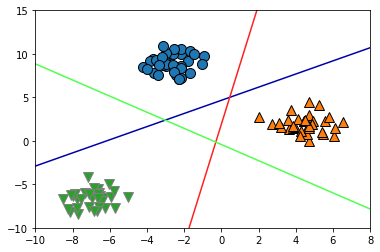

In [47]:
import numpy as np
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/ coef[1], c= color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)

(-10.0, 8.0)

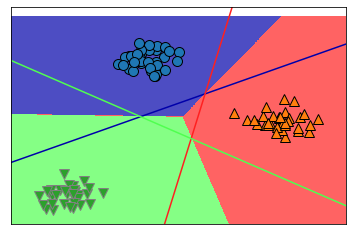

In [48]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept)/ coef[1], c= color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)

# 2.3.4 나이브 베이즈 분류기

위에서 배운 LogisticRegression이나 LinearSVC 같은 선형 분류기보다 훈련 속도가 빠르지만  일반화 성능이 조금 뒤진다

효과적인 이유 : 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문

In [50]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [51]:
counts = {}
for label in np.unique(y):
    # 클래스마다 반복
    # 특성마다 1이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n{}".format(counts))

특성 카운트:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
